In [2]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
import shutil
import dlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Dropout, LSTM, TimeDistributed, Concatenate
from tensorflow.keras.applications import ResNet50, EfficientNetV2B0, Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, Callback
import time

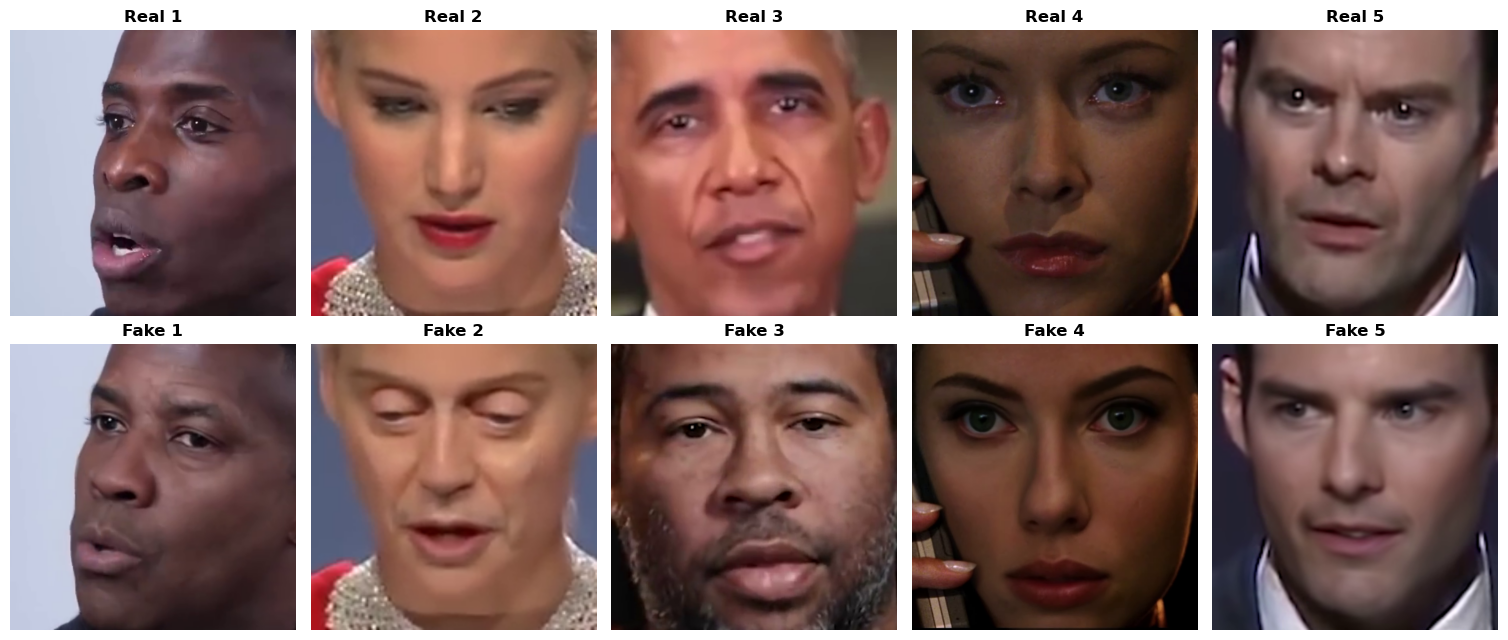

In [61]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the paths for the real and fake folders
real_folder = "real"
fake_folder = "fake"

# Get list of image files from both folders
real_images = sorted([os.path.join(real_folder, img) for img in os.listdir(real_folder) if img.endswith(('.png', '.jpg', '.jpeg'))])
fake_images = sorted([os.path.join(fake_folder, img) for img in os.listdir(fake_folder) if img.endswith(('.png', '.jpg', '.jpeg'))])

# Ensure both folders have the same number of images
num_images = min(len(real_images), len(fake_images))

# Create the plot
fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

# Plot images from the real folder
for i, img_path in enumerate(real_images[:num_images]):
    img = imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Real {i+1}", weight='bold')

# Plot images from the fake folder
for i, img_path in enumerate(fake_images[:num_images]):
    img = imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Fake {i+1}", weight='bold')

# Remove all spaces everywhere
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.01, hspace=0.1)

# Save the figure in high DPI without any external whitespace
plt.savefig("real_vs_fake_no_space.png", dpi=600, bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


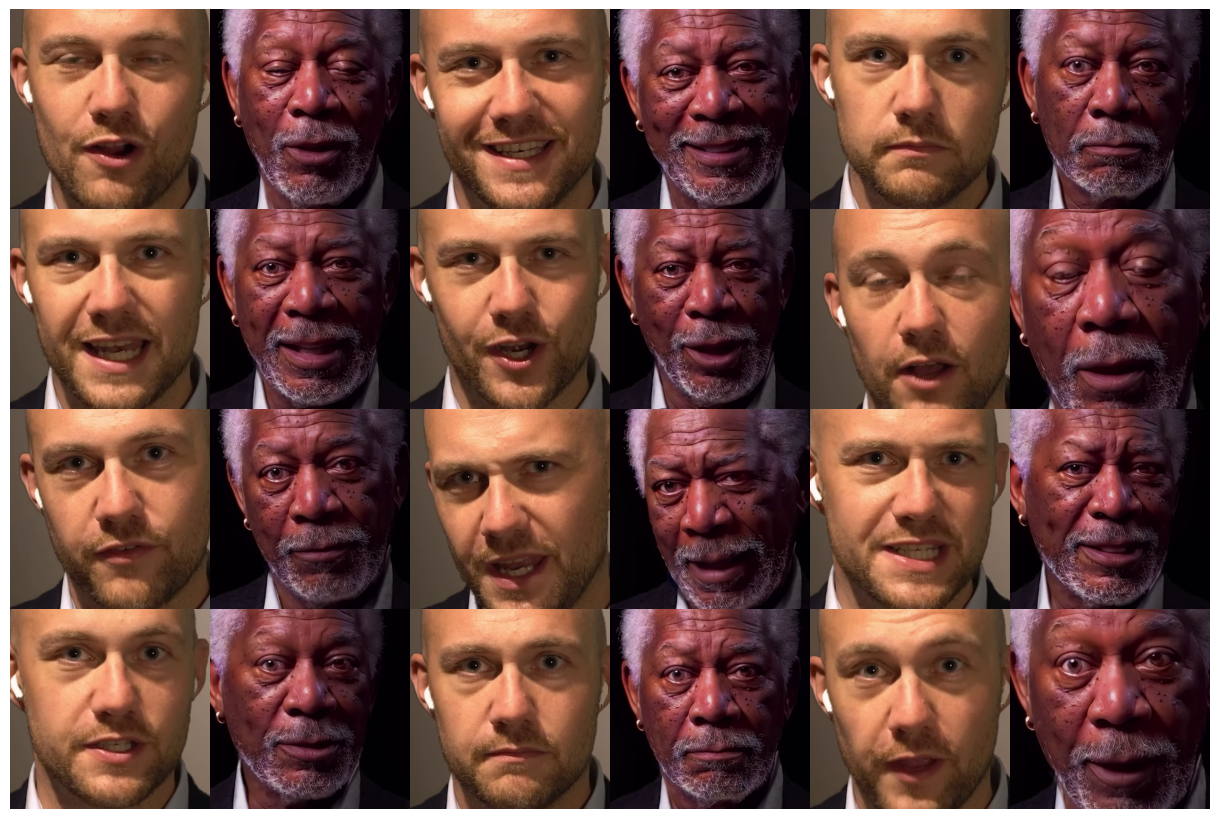

In [62]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the path for the morgan folder
morgan_folder = "morgan"

# Get list of image files from the folder
morgan_images = sorted([os.path.join(morgan_folder, img) for img in os.listdir(morgan_folder) if img.endswith(('.png', '.jpg', '.jpeg'))])

# Ensure exactly 4 rows and 6 columns
num_rows, num_cols = 4, 6
total_slots = num_rows * num_cols

# Add blank placeholders if fewer images than slots
if len(morgan_images) < total_slots:
    morgan_images += [None] * (total_slots - len(morgan_images))

# Create the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Plot each image in the grid
for i, ax in enumerate(axes.flat):
    if morgan_images[i] is not None:  # Plot actual image
        img = imread(morgan_images[i])
        ax.imshow(img)
    ax.axis('off')  # Turn off axes for all subplots

# Remove all spaces between thumbnails
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Save the figure in high DPI without any external whitespace
plt.savefig("morgan_no_space_grid_4x6.png", dpi=600, bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


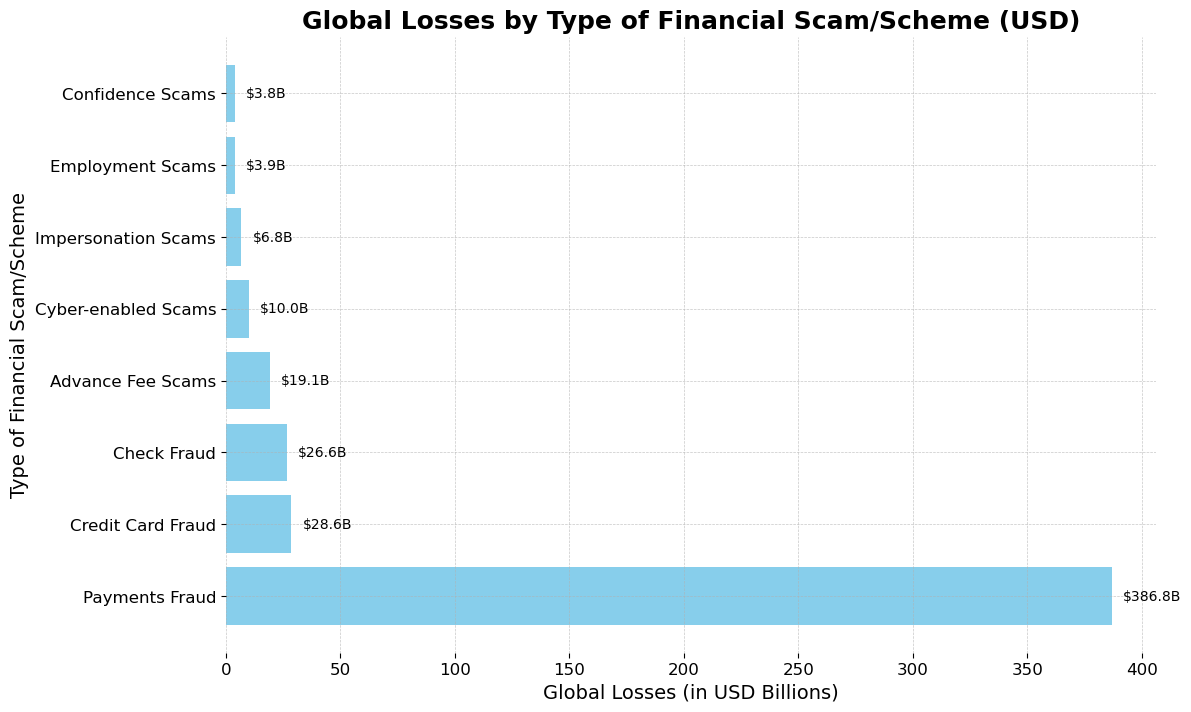

In [1]:
import matplotlib.pyplot as plt

# Data
scam_types = [
    "Payments Fraud", "Credit Card Fraud", "Check Fraud",
    "Advance Fee Scams", "Cyber-enabled Scams",
    "Impersonation Scams", "Employment Scams", "Confidence Scams"
]
losses = [386.8, 28.6, 26.6, 19.1, 10.0, 6.8, 3.9, 3.8]

# Plot Configuration
plt.figure(figsize=(12, 8))
bars = plt.barh(scam_types, losses, color='skyblue')  # Horizontal bar graph without borders

# Adding annotations for the loss values
for bar, loss in zip(bars, losses):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f"${loss}B", 
             va='center', fontsize=10, color='black')

# Titles and Labels
plt.title("Global Losses by Type of Financial Scam/Scheme (USD)", fontsize=18, weight='bold')  # Bold title
plt.xlabel("Global Losses (in USD Billions)", fontsize=14)
plt.ylabel("Type of Financial Scam/Scheme", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid Box Background
plt.grid(which='major', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('white')  # Keep the facecolor white for clarity

# Remove plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Save the figure (Optional in Jupyter)
plt.savefig('financial_scams_loss_grid_box_background_jupyter.png', dpi=600, bbox_inches='tight', format='png')  # Lossless PNG
plt.show()

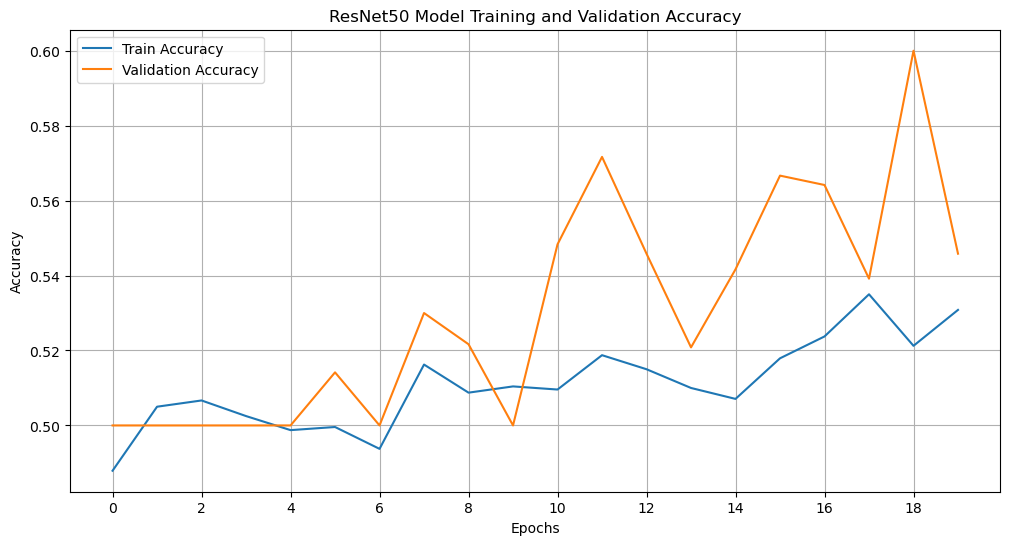

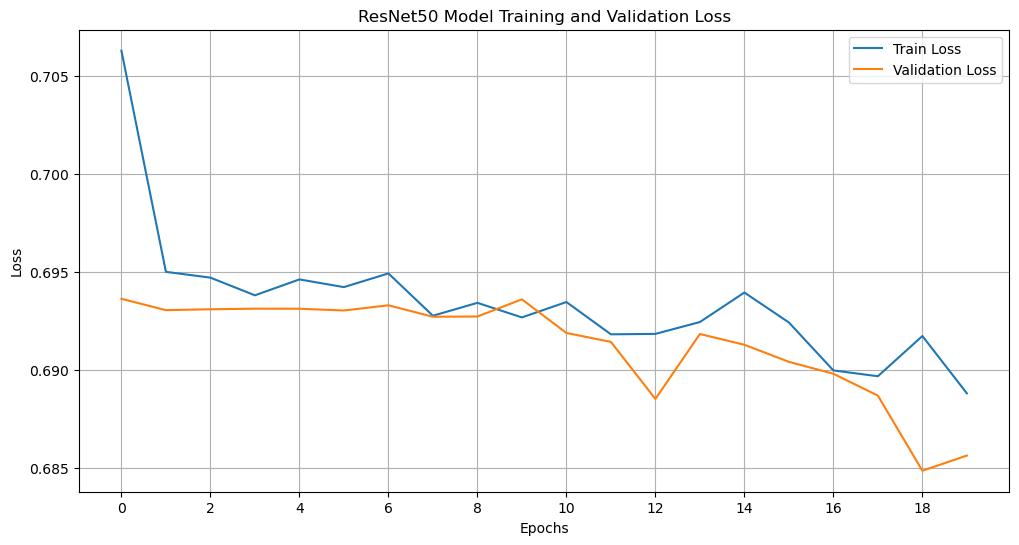

In [7]:
# Load the training log CSV file
log_file = 'resnet_training_log.csv'
history = pd.read_csv(log_file)

# Define the range of epochs to display (0, 2, 4, ...)
epochs = range(len(history))  # Total number of epochs
xticks = list(range(0, len(history), 2))  # Tick only at even epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(xticks)  # Set x-axis ticks
plt.legend()
plt.grid()
plt.savefig('resnet50_training_validation_accuracy.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['loss'], label='Train Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(xticks)  # Set x-axis ticks
plt.legend()
plt.grid()
plt.savefig('resnet50_training_validation_loss.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

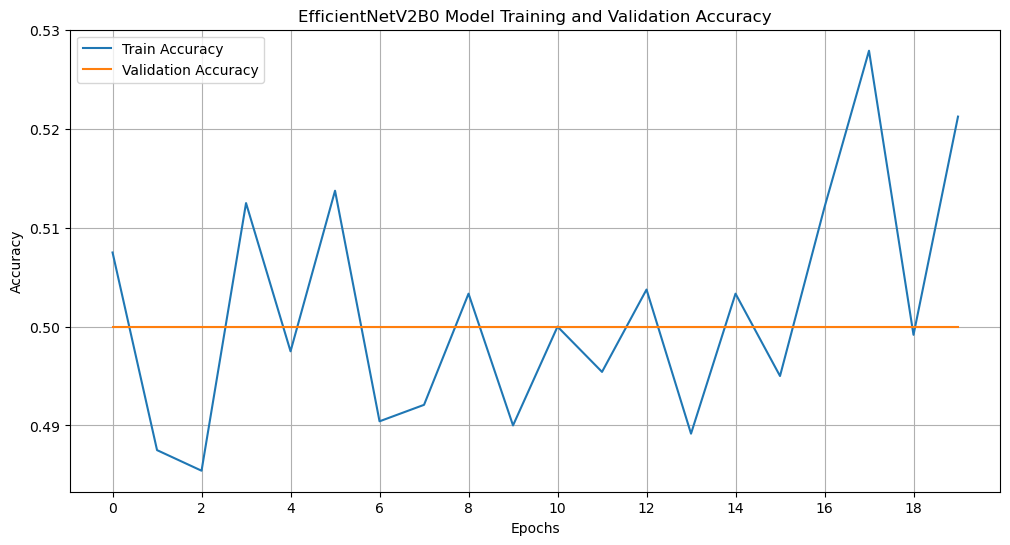

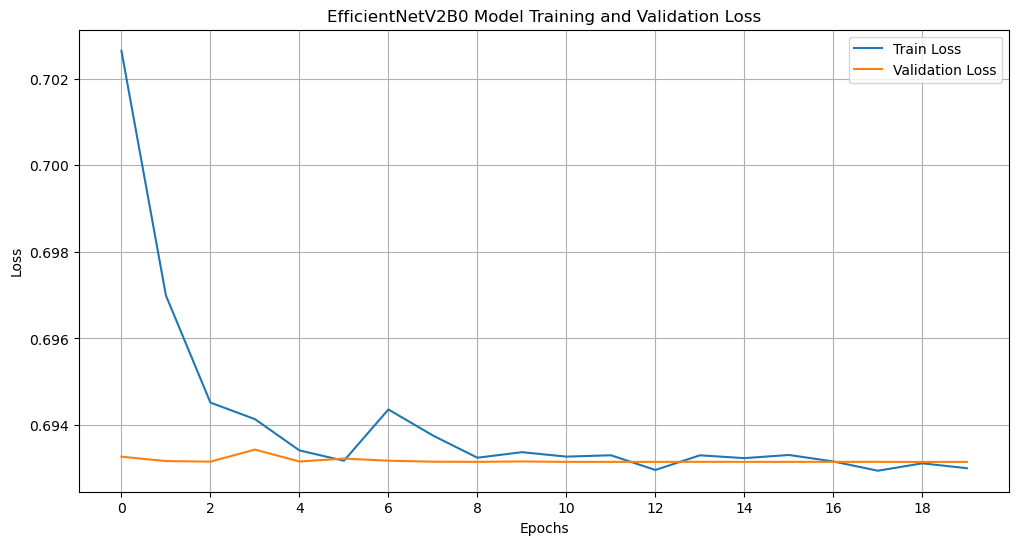

In [9]:
# Load the training log CSV file
log_file = 'efficientnet_training_log.csv'
history = pd.read_csv(log_file)

# Define the range of epochs to display (0, 2, 4, ...)
epochs = range(len(history))  # Total number of epochs
xticks = list(range(0, len(history), 2))  # Tick only at even epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetV2B0 Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(xticks)  # Set x-axis ticks
plt.legend()
plt.grid()
plt.savefig('efficientnetv2b0_training_validation_accuracy.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['loss'], label='Train Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('EfficientNetV2B0 Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(xticks)  # Set x-axis ticks
plt.legend()
plt.grid()
plt.savefig('efficientnetv2b0_training_validation_loss.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

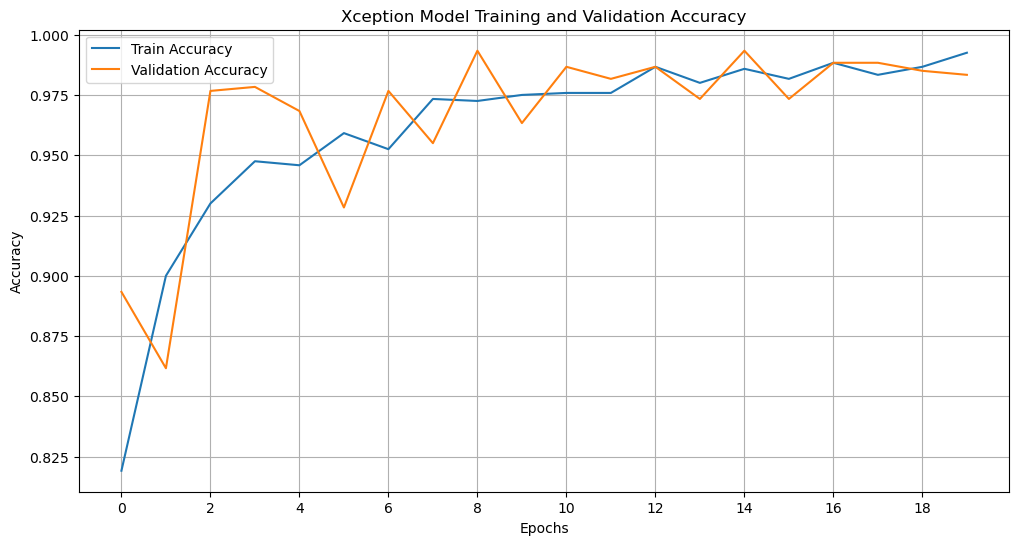

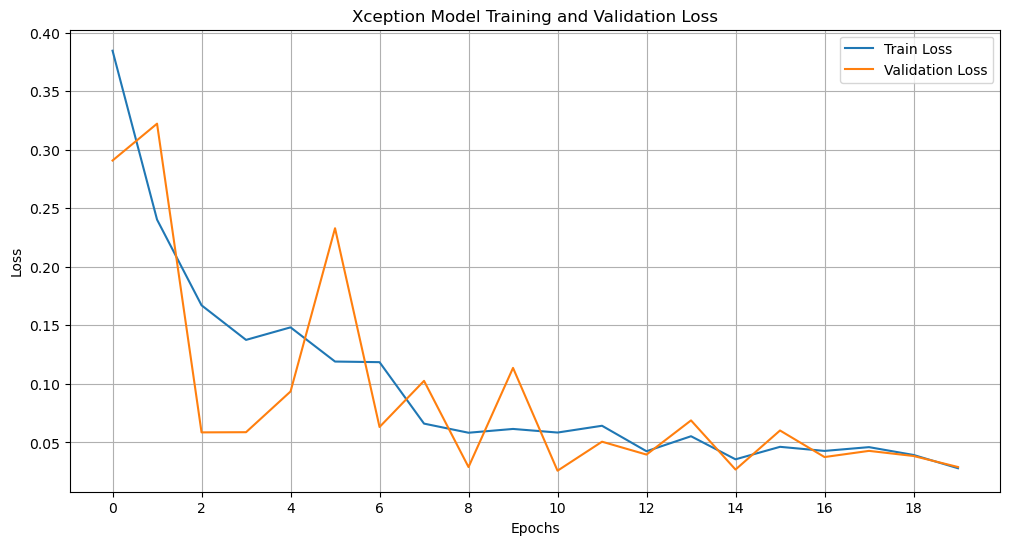

In [10]:
# Load the training log CSV file
log_file = 'xception_training_log.csv'
history = pd.read_csv(log_file)

# Define the range of epochs to display (0, 2, 4, ...)
epochs = range(len(history))  # Total number of epochs
xticks = list(range(0, len(history), 2))  # Tick only at even epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Xception Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(xticks)  # Set x-axis ticks
plt.legend()
plt.grid()
plt.savefig('Xception_training_validation_accuracy.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['loss'], label='Train Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Xception Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(xticks)  # Set x-axis ticks
plt.legend()
plt.grid()
plt.savefig('Xception_training_validation_loss.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load data from Excel file
file_path = "efficientnet_training_logs.xlsx"
learning_rates = pd.read_excel(file_path, sheet_name="Learning Rates")
precision_recall_f1 = pd.read_excel(file_path, sheet_name="Precision-Recall-F1")
epoch_times = pd.read_excel(file_path, sheet_name="Epoch Times")

# Display basic information
print("--- Data Loaded ---")
print("Learning Rates:\n", learning_rates.head())
print("Precision-Recall-F1:\n", precision_recall_f1.head())
print("Epoch Times:\n", epoch_times.head())

# Set general plot style
sns.set_theme(style="whitegrid")


--- Data Loaded ---
Learning Rates:
    epoch  learning_rate
0      1          0.001
1      2          0.001
2      3          0.001
3      4          0.001
4      5          0.001
Precision-Recall-F1:
    epoch  precision  recall  f1_score
0      1        0.0       0  0.000000
1      2        0.0       0  0.000000
2      3        0.5       1  0.666667
3      4        0.0       0  0.000000
4      5        0.5       1  0.666667
Epoch Times:
    epoch    duration
0      1  843.423586
1      2  815.607944
2      3  809.579359
3      4  807.409501
4      5  798.031846


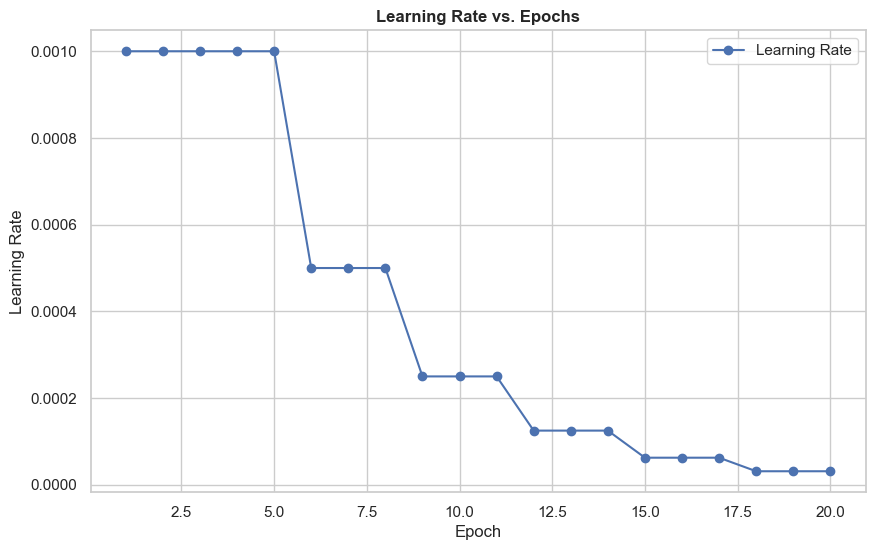

In [12]:
# Learning Rate vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(learning_rates["epoch"], learning_rates["learning_rate"], marker="o", label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate vs. Epochs", fontweight="bold")
plt.grid(True)
plt.legend()
plt.show()


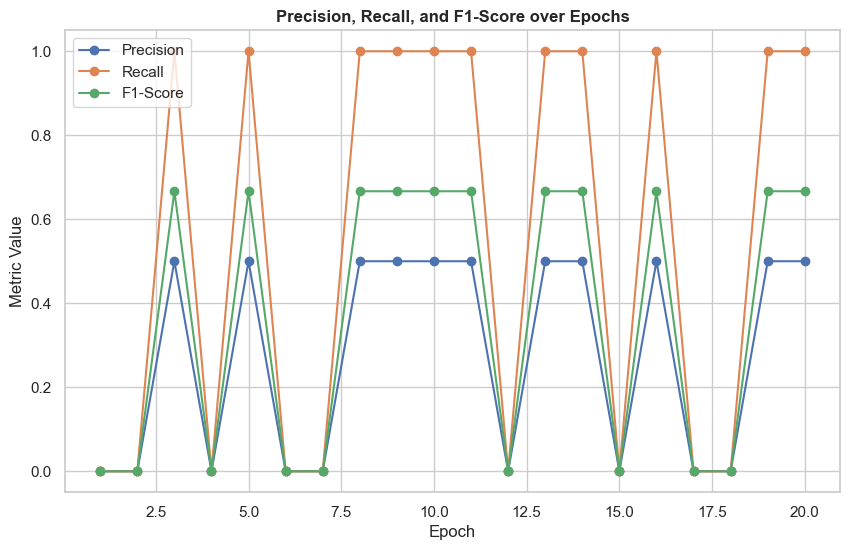

In [13]:
# Precision, Recall, and F1-Score vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(precision_recall_f1["epoch"], precision_recall_f1["precision"], marker="o", label="Precision")
plt.plot(precision_recall_f1["epoch"], precision_recall_f1["recall"], marker="o", label="Recall")
plt.plot(precision_recall_f1["epoch"], precision_recall_f1["f1_score"], marker="o", label="F1-Score")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Precision, Recall, and F1-Score over Epochs", fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


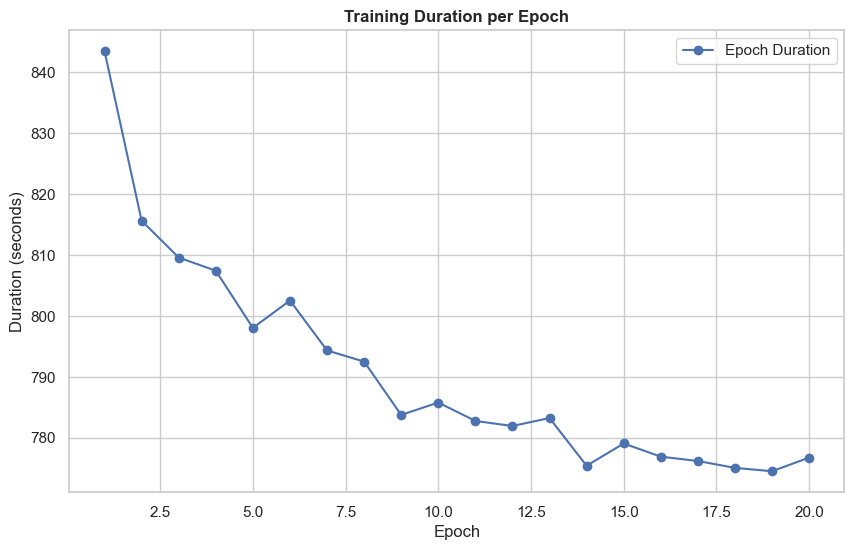

In [15]:
# Training Duration per Epoch
plt.figure(figsize=(10, 6))
plt.plot(epoch_times["epoch"], epoch_times["duration"], marker="o", color="b", label="Epoch Duration")
plt.xlabel("Epoch")
plt.ylabel("Duration (seconds)")
plt.title("Training Duration per Epoch", fontweight="bold")
plt.grid(True)
plt.legend()
plt.show()


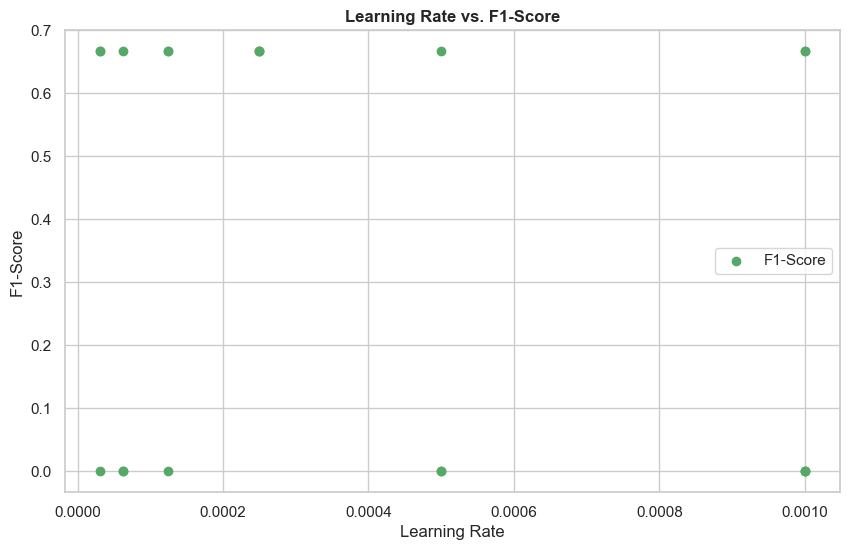

In [16]:
# Learning Rate vs. F1-Score
plt.figure(figsize=(10, 6))
plt.scatter(learning_rates["learning_rate"], precision_recall_f1["f1_score"], color="g", label="F1-Score")
plt.xlabel("Learning Rate")
plt.ylabel("F1-Score")
plt.title("Learning Rate vs. F1-Score", fontweight="bold")
plt.grid(True)
plt.legend()
plt.show()


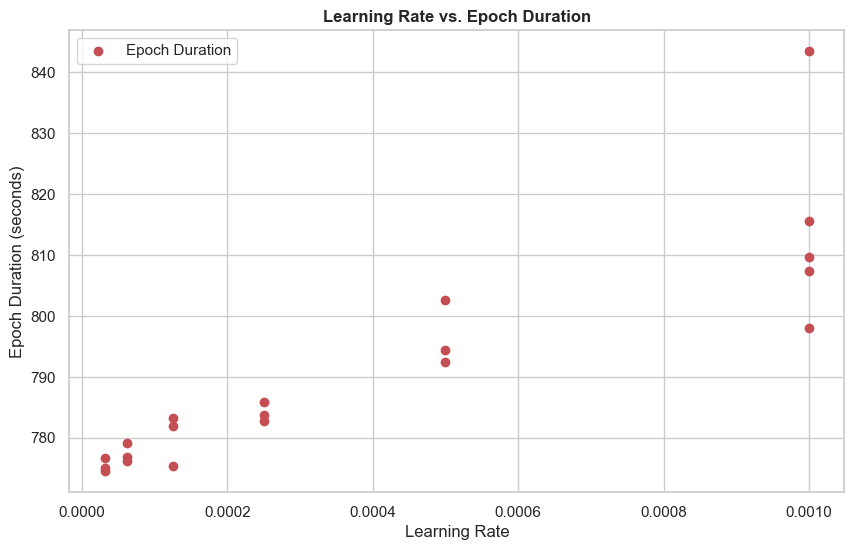

In [17]:
# Learning Rate vs. Epoch Time
plt.figure(figsize=(10, 6))
plt.scatter(learning_rates["learning_rate"], epoch_times["duration"], color="r", label="Epoch Duration")
plt.xlabel("Learning Rate")
plt.ylabel("Epoch Duration (seconds)")
plt.title("Learning Rate vs. Epoch Duration", fontweight="bold")
plt.grid(True)
plt.legend()
plt.show()


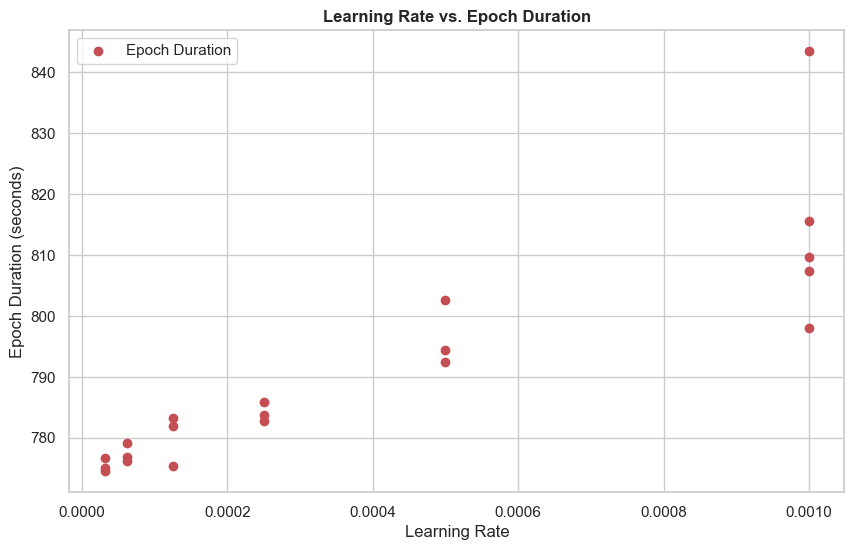

In [18]:
# Learning Rate vs. Epoch Time
plt.figure(figsize=(10, 6))
plt.scatter(learning_rates["learning_rate"], epoch_times["duration"], color="r", label="Epoch Duration")
plt.xlabel("Learning Rate")
plt.ylabel("Epoch Duration (seconds)")
plt.title("Learning Rate vs. Epoch Duration", fontweight="bold")
plt.grid(True)
plt.legend()
plt.show()


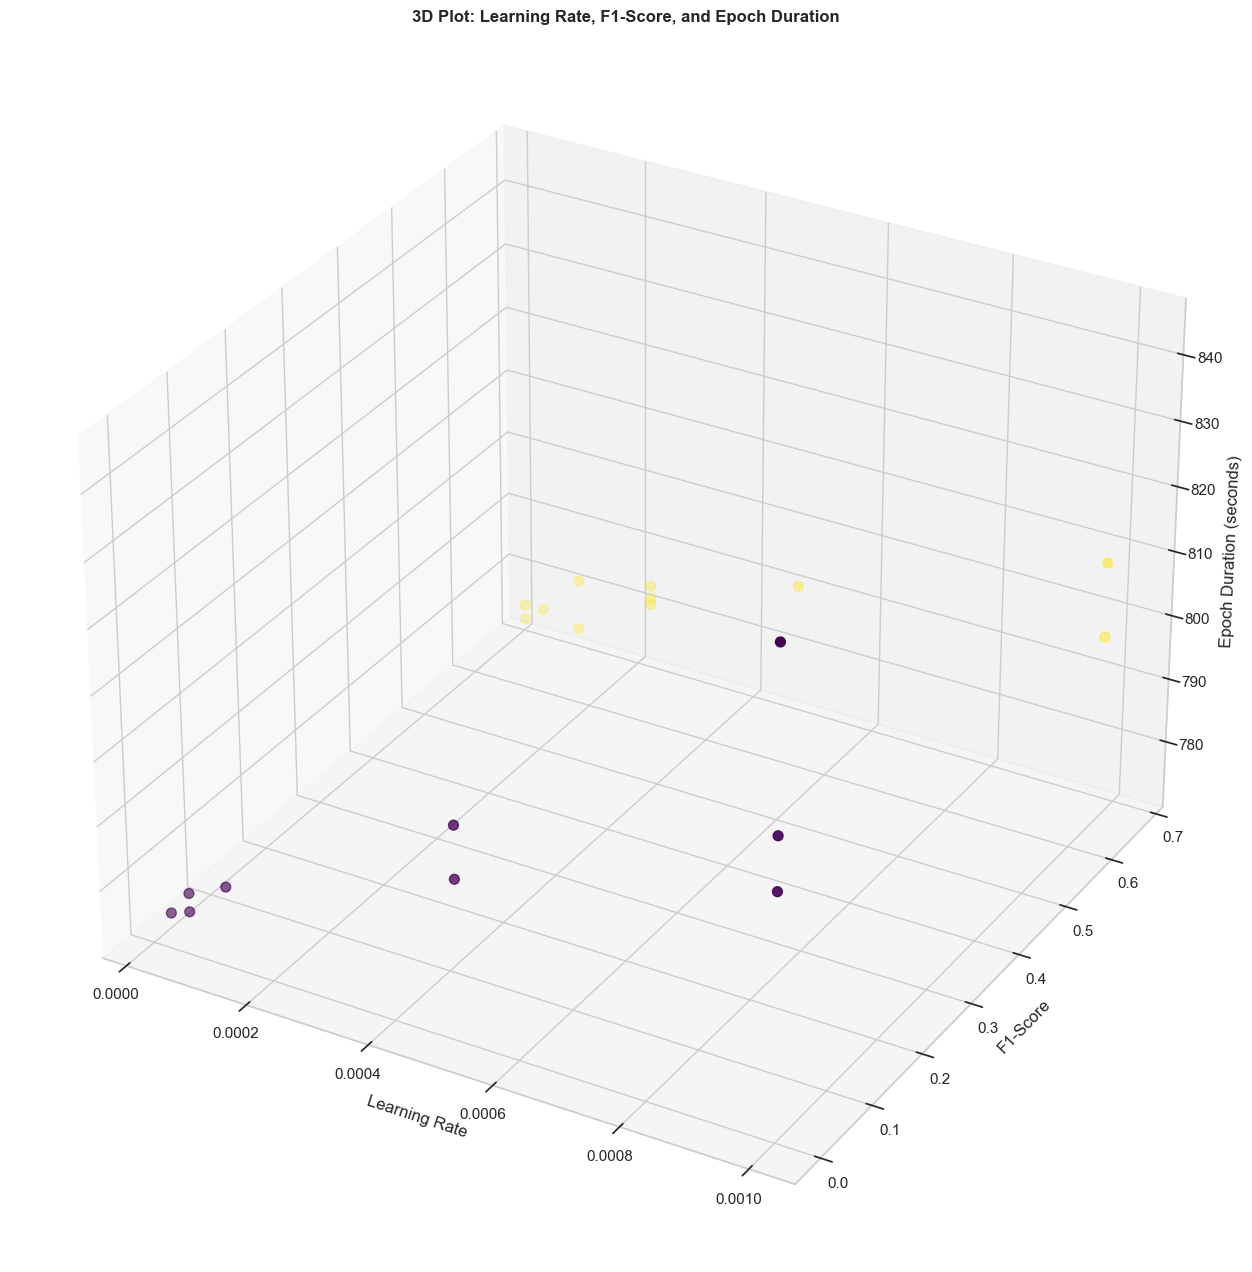

In [27]:
# 3D Scatter Plot
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    learning_rates["learning_rate"],
    precision_recall_f1["f1_score"],
    epoch_times["duration"],
    c=precision_recall_f1["f1_score"],
    cmap="viridis",
    s=50
)

ax.set_xlabel("Learning Rate")
ax.set_ylabel("F1-Score")
ax.set_zlabel("Epoch Duration (seconds)")
ax.set_title("3D Plot: Learning Rate, F1-Score, and Epoch Duration", fontweight="bold")
plt.show()


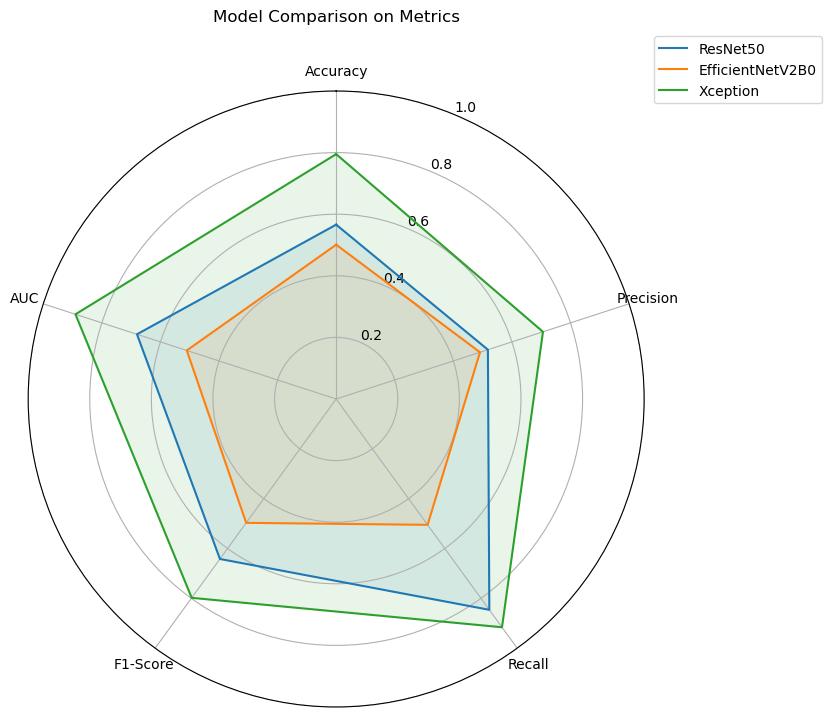

In [2]:
# Data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
metrics = ['ResNet50', 'EfficientNetV2B0', 'Xception']
data = {
    'ResNet50': [56.6, 51.8, 84.6, 64.2, 0.68],
    'EfficientNetV2B0': [50.1, 49.1, 50.5, 49.7, 0.51],
    'Xception': [79.5, 70.6, 91.6, 79.8, 0.89]
}

# Convert data to percentages (0-1 scale for radar chart)
for key in data:
    data[key] = [x if x <= 1 else x / 100 for x in data[key]]

# Preparing radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model, values in data.items():
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Scale 0 to 1 for all metrics
ax.set_title("Model Comparison on Metrics", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


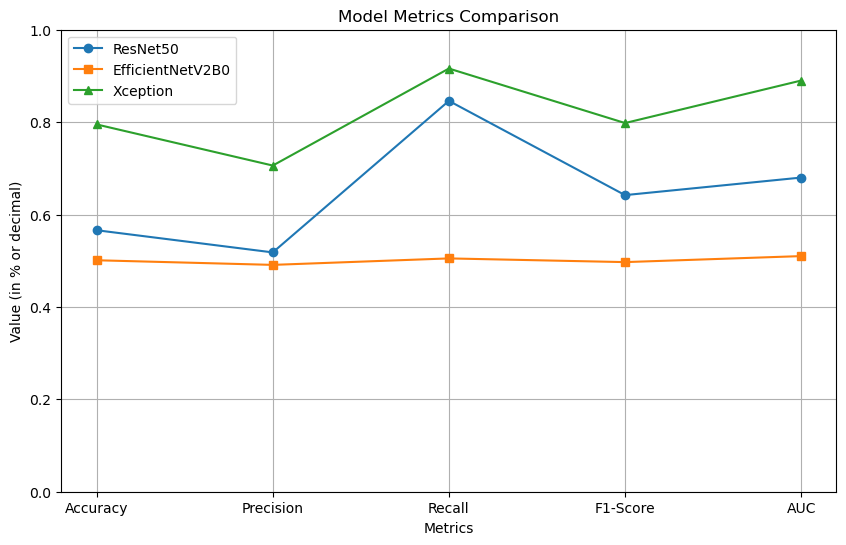

In [3]:
# Data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
resnet50 = [56.6, 51.8, 84.6, 64.2, 0.68]
efficientnet = [50.1, 49.1, 50.5, 49.7, 0.51]
xception = [79.5, 70.6, 91.6, 79.8, 0.89]

# Normalize percentages to decimals
resnet50 = [x if x <= 1 else x / 100 for x in resnet50]
efficientnet = [x if x <= 1 else x / 100 for x in efficientnet]
xception = [x if x <= 1 else x / 100 for x in xception]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(labels, resnet50, marker='o', label='ResNet50')
plt.plot(labels, efficientnet, marker='s', label='EfficientNetV2B0')
plt.plot(labels, xception, marker='^', label='Xception')

# Formatting
plt.title("Model Metrics Comparison")
plt.xlabel("Metrics")
plt.ylabel("Value (in % or decimal)")
plt.ylim(0, 1)  # Normalize between 0 and 1
plt.legend()
plt.grid(True)
plt.show()


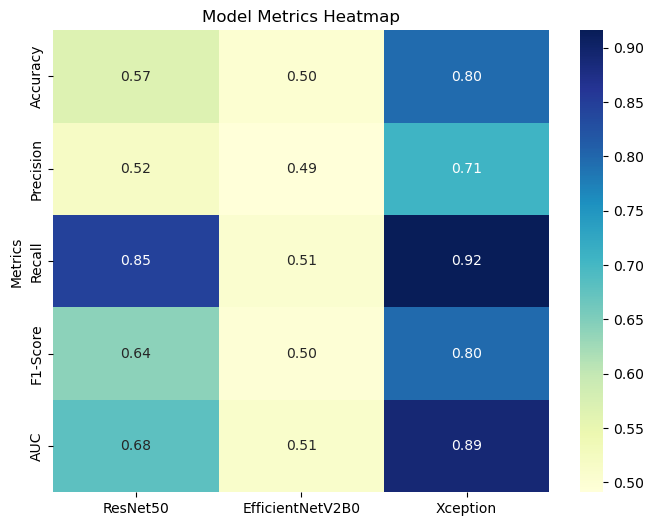

In [4]:
# Data
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'ResNet50': [56.6, 51.8, 84.6, 64.2, 0.68],
    'EfficientNetV2B0': [50.1, 49.1, 50.5, 49.7, 0.51],
    'Xception': [79.5, 70.6, 91.6, 79.8, 0.89]
}

df = pd.DataFrame(data)
df.set_index('Metrics', inplace=True)

# Normalize percentages to decimals
df = df.applymap(lambda x: x if x <= 1 else x / 100)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', cbar=True, fmt=".2f")
plt.title("Model Metrics Heatmap")
plt.show()


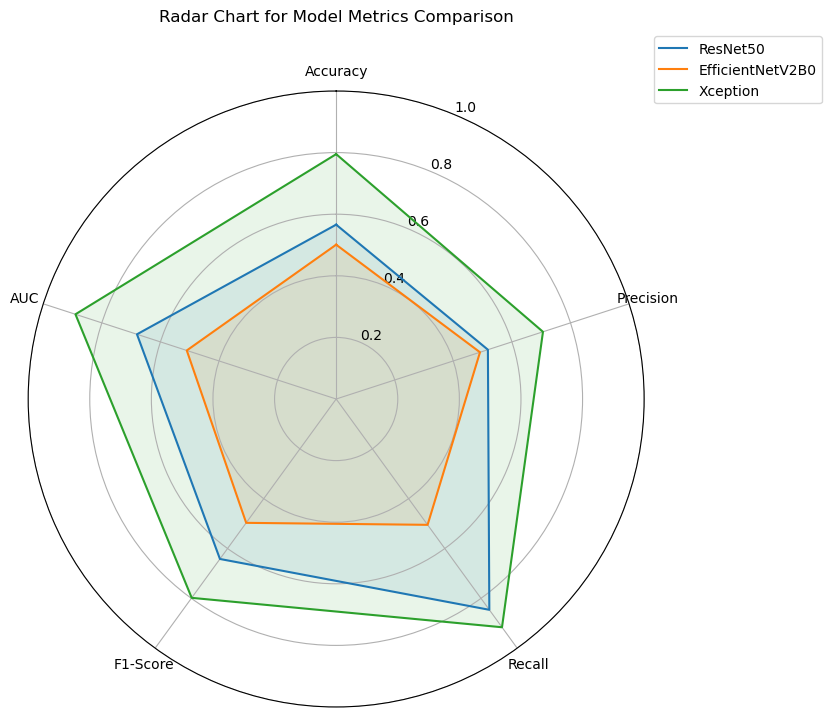

In [6]:
# Data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
metrics = ['ResNet50', 'EfficientNetV2B0', 'Xception']
data = {
    'ResNet50': [56.6, 51.8, 84.6, 64.2, 0.68],
    'EfficientNetV2B0': [50.1, 49.1, 50.5, 49.7, 0.51],
    'Xception': [79.5, 70.6, 91.6, 79.8, 0.89]
}

# Normalize data to 0-1 range
for model in data:
    data[model] = [x if x <= 1 else x / 100 for x in data[model]]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model, values in data.items():
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Scale 0-1
ax.set_title("Radar Chart for Model Metrics Comparison", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show plot


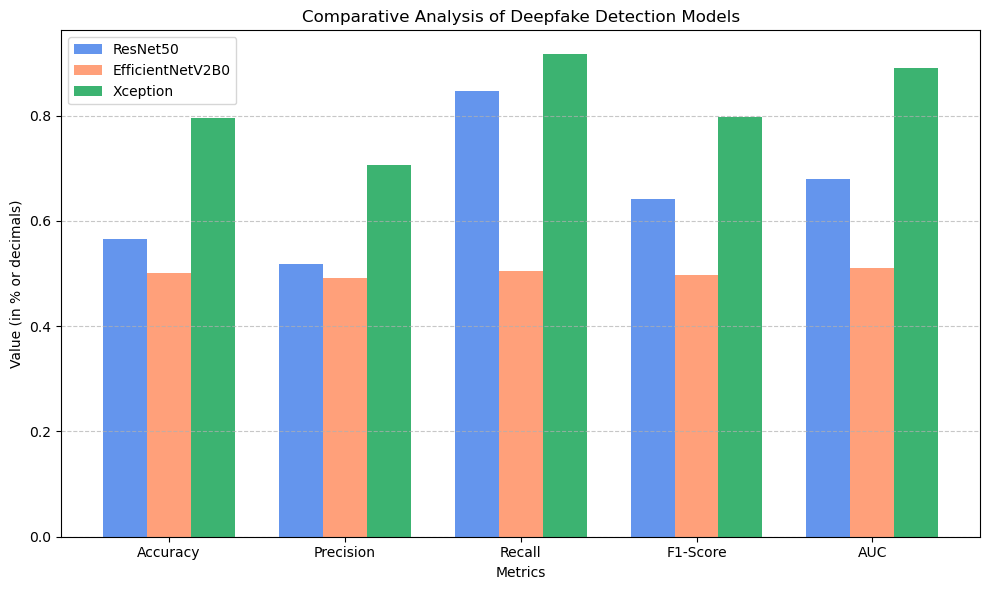

In [8]:
# Data
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'ResNet50': [56.6, 51.8, 84.6, 64.2, 0.68],
    'EfficientNetV2B0': [50.1, 49.1, 50.5, 49.7, 0.51],
    'Xception': [79.5, 70.6, 91.6, 79.8, 0.89]
}

# Convert percentages to decimal for plotting
data['ResNet50'] = [x if x <= 1 else x / 100 for x in data['ResNet50']]
data['EfficientNetV2B0'] = [x if x <= 1 else x / 100 for x in data['EfficientNetV2B0']]
data['Xception'] = [x if x <= 1 else x / 100 for x in data['Xception']]

# Create DataFrame
df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Bar width
x = range(len(df['Metrics']))

# Define professional muted colors
colors = ['#6495ED', '#FFA07A', '#3CB371']

ax.bar([pos - width for pos in x], df['ResNet50'], width, color=colors[0], label='ResNet50')
ax.bar(x, df['EfficientNetV2B0'], width, color=colors[1], label='EfficientNetV2B0')
ax.bar([pos + width for pos in x], df['Xception'], width, color=colors[2], label='Xception')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(df['Metrics'])
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (in % or decimals)')
ax.set_title('Comparative Analysis of Deepfake Detection Models')
ax.legend()

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


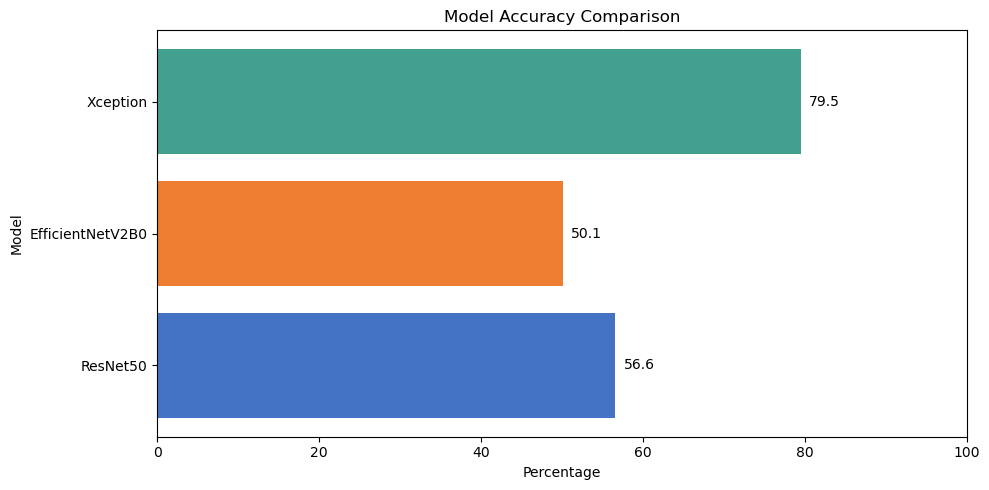

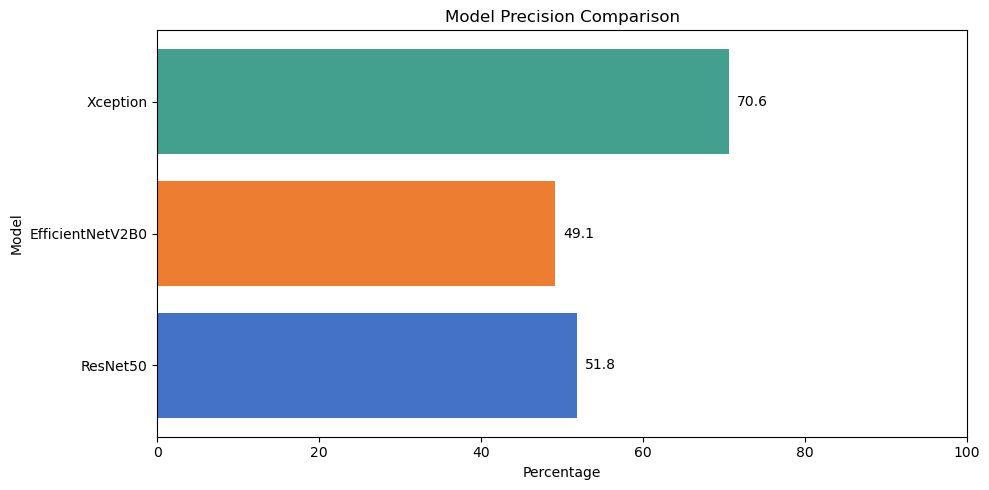

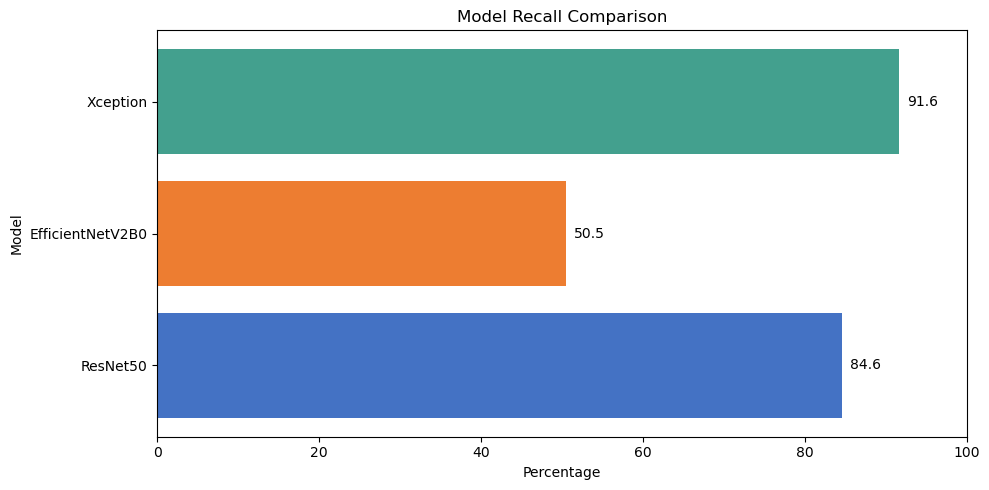

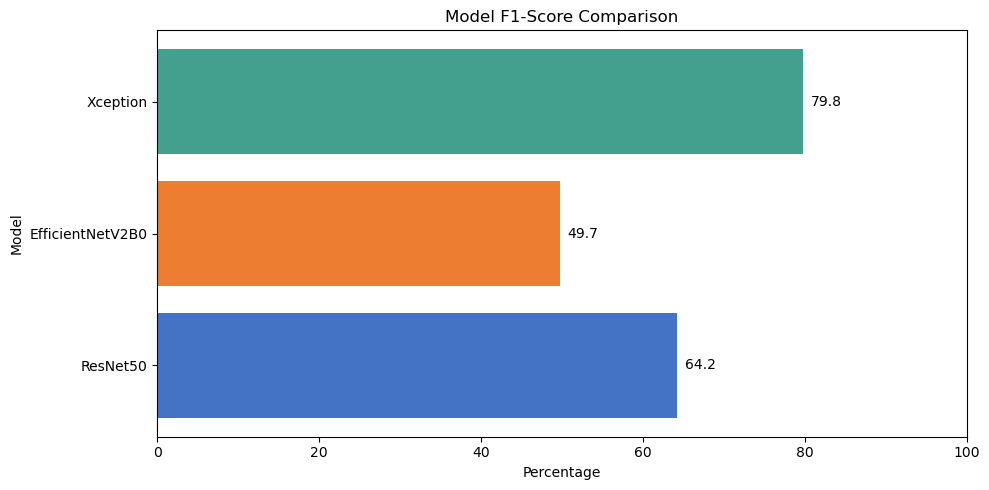

In [7]:
# Data
data = {
    'Model': ['ResNet50', 'EfficientNetV2B0', 'Xception'],
    'Accuracy': [56.6, 50.1, 79.5],
    'Precision': [51.8, 49.1, 70.6],
    'Recall': [84.6, 50.5, 91.6],
    'F1-Score': [64.2, 49.7, 79.8]
}

colors = ['#4472c4', '#ed7d31', '#43a08e']

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.barh(data['Model'], data['Accuracy'], color=colors)
for index, value in enumerate(data['Accuracy']):
    plt.text(value + 1, index, f"{value}", va='center')
plt.title('Model Accuracy Comparison')
plt.xlabel('Percentage')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('accuracy_plot.png', dpi=600)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
plt.barh(data['Model'], data['Precision'], color=colors)
for index, value in enumerate(data['Precision']):
    plt.text(value + 1, index, f"{value}", va='center')
plt.title('Model Precision Comparison')
plt.xlabel('Percentage')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('precision_plot.png', dpi=600)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
plt.barh(data['Model'], data['Recall'], color=colors)
for index, value in enumerate(data['Recall']):
    plt.text(value + 1, index, f"{value}", va='center')
plt.title('Model Recall Comparison')
plt.xlabel('Percentage')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('recall_plot.png', dpi=600)
plt.show()

# Plot F1-Score
plt.figure(figsize=(10, 5))
plt.barh(data['Model'], data['F1-Score'], color=colors)
for index, value in enumerate(data['F1-Score']):
    plt.text(value + 1, index, f"{value}", va='center')
plt.title('Model F1-Score Comparison')
plt.xlabel('Percentage')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('f1_score_plot.png', dpi=600)
plt.show()
